In [36]:
!pip install pyPLNmodels

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/home/bastien/miniconda3/lib/python3.10/site-packages/numpy-1.23.5.dist-info/METADATA'


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


## pyPLNmodels

We assume the data comes from a PLN model:  $ \text{counts} \sim  \mathcal P(\exp(\text{Z}))$, where $Z$ are some unknown latent variables.

The goal of the package is to retrieve the latent variables $Z$ given the counts. To do so, one can instantiate a Pln or PlnPCA model, fit it and then extract the latent variables.  

### Import the needed functions

In [1]:
from pyPLNmodels import load_scrna, load_model, Pln, PlnPCA, PlnPCAcollection, ZIPln, load_microcosm
import matplotlib.pyplot as plt

### Load the data

In [2]:
data  = load_scrna(return_labels=True) 
counts = data["endog"]
labels = data["labels"]

Returning dataset of size (469, 200)


### Poisson Log Normal (Pln) model

In [3]:
pln = Pln(counts, add_const = True)
pln.fit()

Setting the offsets to zero
Fitting a Pln model with full covariance model.
Initialization ...
Initialization finished
Tolerance 0.001 reached in 382 iterations


#### Once fitted, we can extract multiple variables:

In [5]:
gaussian = pln.latent_variables
print(gaussian.shape)

torch.Size([469, 200])


In [6]:
## Only an intercept

In [7]:
model_param = pln.model_parameters
print(model_param["coef"].shape)
print(model_param["covariance"].shape)

torch.Size([1, 200])
torch.Size([200, 200])


### Principal Component Analysis Pln (PlnPCA) model

In [8]:
pca = PlnPCA(counts, add_const = True, rank = 5)
pca.fit()

Setting the offsets to zero
Fitting a PlnPCA model with  5 principal component.
Initialization ...
Initialization finished
Tolerance 0.001 reached in 462 iterations


In [9]:
print(pca)

A multivariate Poisson Lognormal with  5 principal component. 
     Loglike   Dimension    Nb param         BIC         AIC
   -284578.0         200        1190      288237      285768
* Useful properties
    .latent_variables, .model_parameters, .latent_parameters, .optim_parameters
* Useful methods
    .show(), .transform(), .sigma(), .predict(), .pca_projected_latent_variables(), .plot_pca_correlation_circle(), .viz(), .pca_pairplot(), .plot_expected_vs_true()
* Additional properties for PlnPCA
    .projected_latent_variables
* Additional methods for PlnPCA
    None


In [10]:
print(pca.latent_variables.shape)

torch.Size([469, 200])


In [11]:
print(pca.model_parameters["components"].shape)
print(pca.model_parameters["coef"].shape)

torch.Size([200, 5])
torch.Size([1, 200])


### Save the model in order to load it back after:

In [12]:
pca.save() ## You can set a name to the file saved.
dict_init = load_model("PlnPCA_nbcov_1_dim_200_rank_5")
loaded_pca = PlnPCA(counts, add_const = True, dict_initialization=  dict_init)
print(loaded_pca)

Setting the offsets to zero
(469, 5)
(469, 5)
(1, 200)
(200, 5)
A multivariate Poisson Lognormal with  5 principal component. 
     Loglike   Dimension    Nb param         BIC         AIC
  -284576.06         200        1190      288235      285766
* Useful properties
    .latent_variables, .model_parameters, .latent_parameters, .optim_parameters
* Useful methods
    .show(), .transform(), .sigma(), .predict(), .pca_projected_latent_variables(), .plot_pca_correlation_circle(), .viz(), .pca_pairplot(), .plot_expected_vs_true()
* Additional properties for PlnPCA
    .projected_latent_variables
* Additional methods for PlnPCA
    None


### Zero-Inflated PLN (ZIPln)

In [13]:
zi = ZIPln(counts)
zi.fit()
print(zi)

Setting the offsets to zero
Fitting a ZIPln model with full covariance model with column-wise zero-inflation and closed form for latent prob.
Initialization ...
Initialization finished
Tolerance 0.001 reached in 270 iterations
A multivariate Poisson Lognormal with full covariance model with column-wise zero-inflation and closed form for latent prob. 
     Loglike   Dimension    Nb param         BIC         AIC
   -177801.9         200       20500      240845      198301
* Useful properties
    .latent_variables, .model_parameters, .latent_parameters, .optim_parameters
* Useful methods
    .show(), .transform(), .sigma(), .predict(), .pca_projected_latent_variables(), .plot_pca_correlation_circle(), .viz(), .pca_pairplot(), .plot_expected_vs_true()
* Additional properties for ZIPln
    .projected_latent_variables, .latent_prob, .proba_inflation
* Additional methods for ZIPln
    .visualize_latent_prob(), .pca_pairplot_prob(), .predict_prob_inflation() 


#### Inflation can also be row-wise (default is column-wise)

In [14]:
zi_row = ZIPln(counts, zero_inflation_formula = "row-wise")
zi_row.fit()
print(zi_row)

Setting the offsets to zero
Fitting a ZIPln model with full covariance model with row-wise zero-inflation and closed form for latent prob.
Initialization ...
Initialization finished
Tolerance 0.001 reached in 264 iterations
A multivariate Poisson Lognormal with full covariance model with row-wise zero-inflation and closed form for latent prob. 
     Loglike   Dimension    Nb param         BIC         AIC
  -178015.12         200       20500      241058      198515
* Useful properties
    .latent_variables, .model_parameters, .latent_parameters, .optim_parameters
* Useful methods
    .show(), .transform(), .sigma(), .predict(), .pca_projected_latent_variables(), .plot_pca_correlation_circle(), .viz(), .pca_pairplot(), .plot_expected_vs_true()
* Additional properties for ZIPln
    .projected_latent_variables, .latent_prob, .proba_inflation
* Additional methods for ZIPln
    .visualize_latent_prob(), .pca_pairplot_prob(), .predict_prob_inflation() 


### Fit multiple PCA and choose the best rank with BIC or AIC criterion

In [15]:
pca_col = PlnPCAcollection(counts, add_const = True, ranks = [5,15,25,40,50])
pca_col.fit()

Setting the offsets to zero
Fitting a PlnPCA model with  5 principal component.
Initialization ...
Initialization finished
Tolerance 0.001 reached in 507 iterations
Fitting a PlnPCA model with  15 principal component.
Initialization ...
Initialization finished
Tolerance 0.001 reached in 465 iterations
Fitting a PlnPCA model with  25 principal component.
Initialization ...
Initialization finished
Tolerance 0.001 reached in 459 iterations
Fitting a PlnPCA model with  40 principal component.
Initialization ...
Initialization finished
Tolerance 0.001 reached in 450 iterations
Fitting a PlnPCA model with  50 principal component.
Initialization ...
Initialization finished
Tolerance 0.001 reached in 435 iterations

DONE!
    Best model(lower BIC): 40
 
    Best model(lower AIC): 50
 



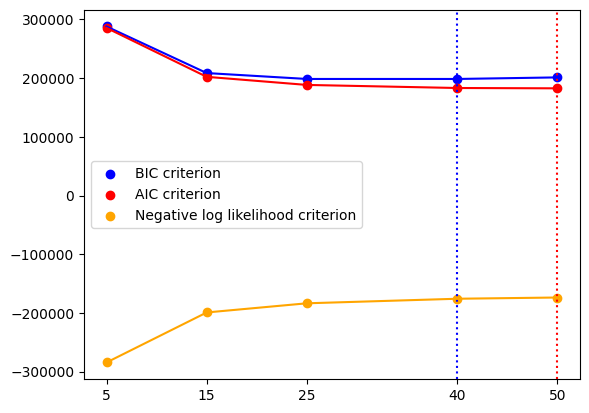

In [16]:
pca_col.show()

In [17]:
print(pca_col)


----------------------------------------------------------------------
Collection of 5 PlnPCAcollection models with                     200 variables.
----------------------------------------------------------------------
 - Ranks considered:[5, 15, 25, 40, 50]
 - BIC metric:
        rank           5          15          25          40          50
   criterion      288093      208715      198657      198656      201330

   Best model(lower BIC): 40
 
 - AIC metric:
        rank           5          15          25          40          50
   criterion      285624      202292      188489      183257      182704

   Best model(lower AIC): 50
----------------------------------------------------------------------
* Useful properties
    .BIC, .AIC, .loglikes
* Useful methods 
    .show(), .best_model(), .keys(), .items(), .values()
----------------------------------------------------------------------



### Extract the best model found (according to AIC or BIC criterion).

#### AIC best model

In [18]:
print(pca_col.best_model(criterion = "AIC"))

A multivariate Poisson Lognormal with  50 principal component. 
     Loglike   Dimension    Nb param         BIC         AIC
  -173729.49         200        8975      201330      182704
* Useful properties
    .latent_variables, .model_parameters, .latent_parameters, .optim_parameters
* Useful methods
    .show(), .transform(), .sigma(), .predict(), .pca_projected_latent_variables(), .plot_pca_correlation_circle(), .viz(), .pca_pairplot(), .plot_expected_vs_true()
* Additional properties for PlnPCA
    .projected_latent_variables
* Additional methods for PlnPCA
    None


#### BIC best model

In [19]:
print(pca_col.best_model(criterion = "BIC"))

A multivariate Poisson Lognormal with  40 principal component. 
     Loglike   Dimension    Nb param         BIC         AIC
  -175837.69         200        7420      198656      183257
* Useful properties
    .latent_variables, .model_parameters, .latent_parameters, .optim_parameters
* Useful methods
    .show(), .transform(), .sigma(), .predict(), .pca_projected_latent_variables(), .plot_pca_correlation_circle(), .viz(), .pca_pairplot(), .plot_expected_vs_true()
* Additional properties for PlnPCA
    .projected_latent_variables
* Additional methods for PlnPCA
    None


# Visualization

#### Visualization of the individuals (sites) with PCA on the latent variables.

#### with Pln

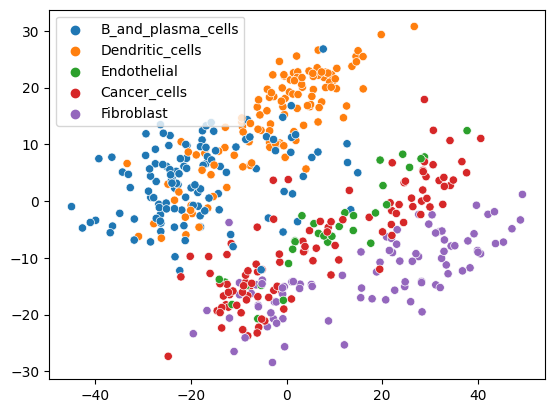

In [20]:
pln.viz(colors=labels)
plt.show()

#### with PlnPCA

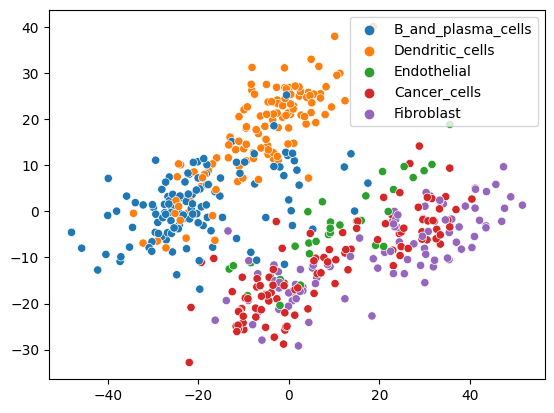

In [21]:
best_pca = pca_col.best_model()
best_pca.viz(colors = labels)
plt.show()

#### With the ZIPln

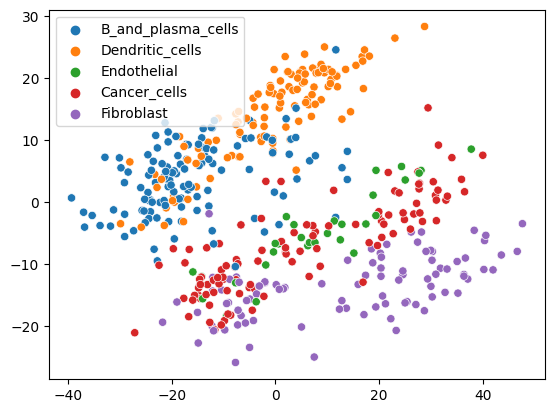

In [22]:
zi.viz(colors = labels)

### What would give a PCA on the log normalize data ? 

In [23]:
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns

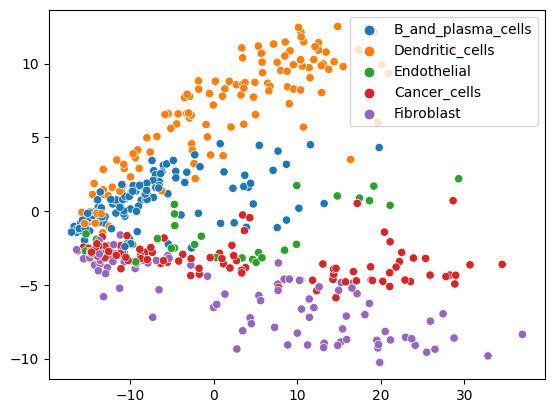

In [24]:
sk_pca = PCA(n_components = 2)
pca_log_counts = sk_pca.fit_transform(np.log(counts + (counts == 0)))
_ = sns.scatterplot(x = pca_log_counts[:,0], y = pca_log_counts[:,1], hue = labels)

### Visualization of the variables

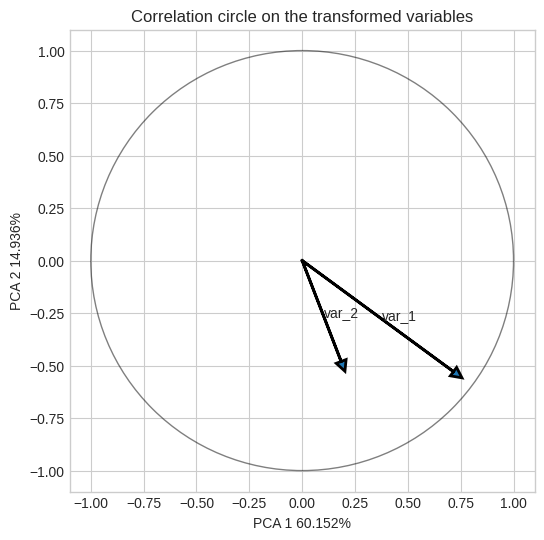

In [25]:
pln.plot_pca_correlation_circle(["var_1","var_2"], indices_of_variables = [0,1])
plt.show()

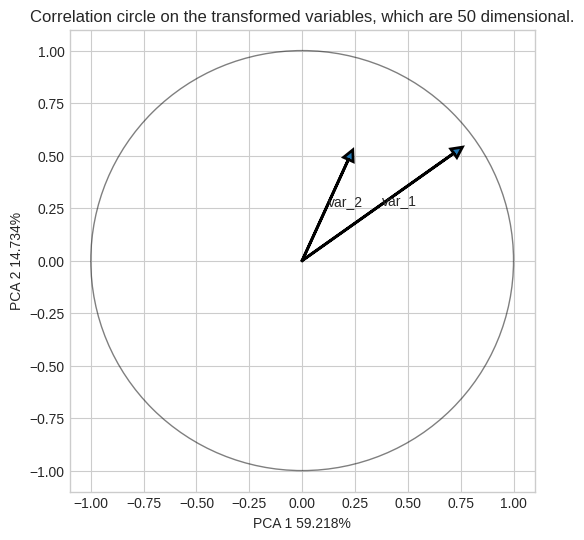

In [26]:
best_pca.plot_pca_correlation_circle(["var_1","var_2"], indices_of_variables = [0,1])
plt.show()

### Visualization of each components of the PCA


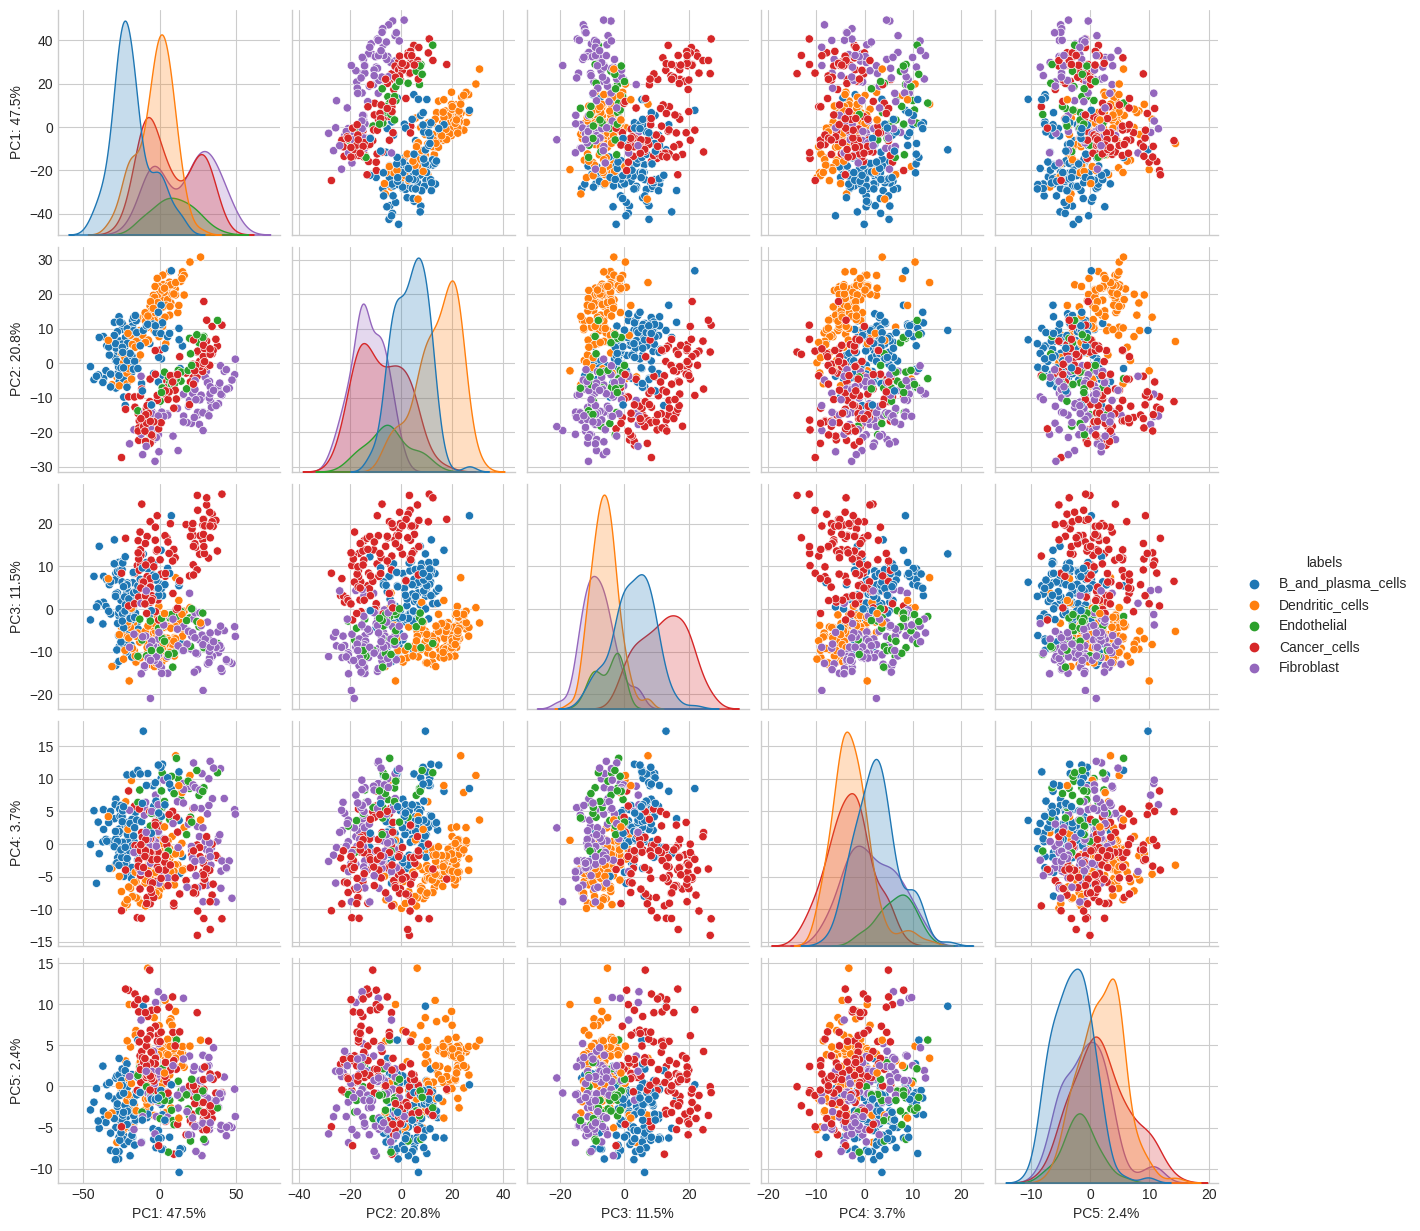

In [27]:
pln.pca_pairplot(colors = labels, n_components = 5)
plt.show()

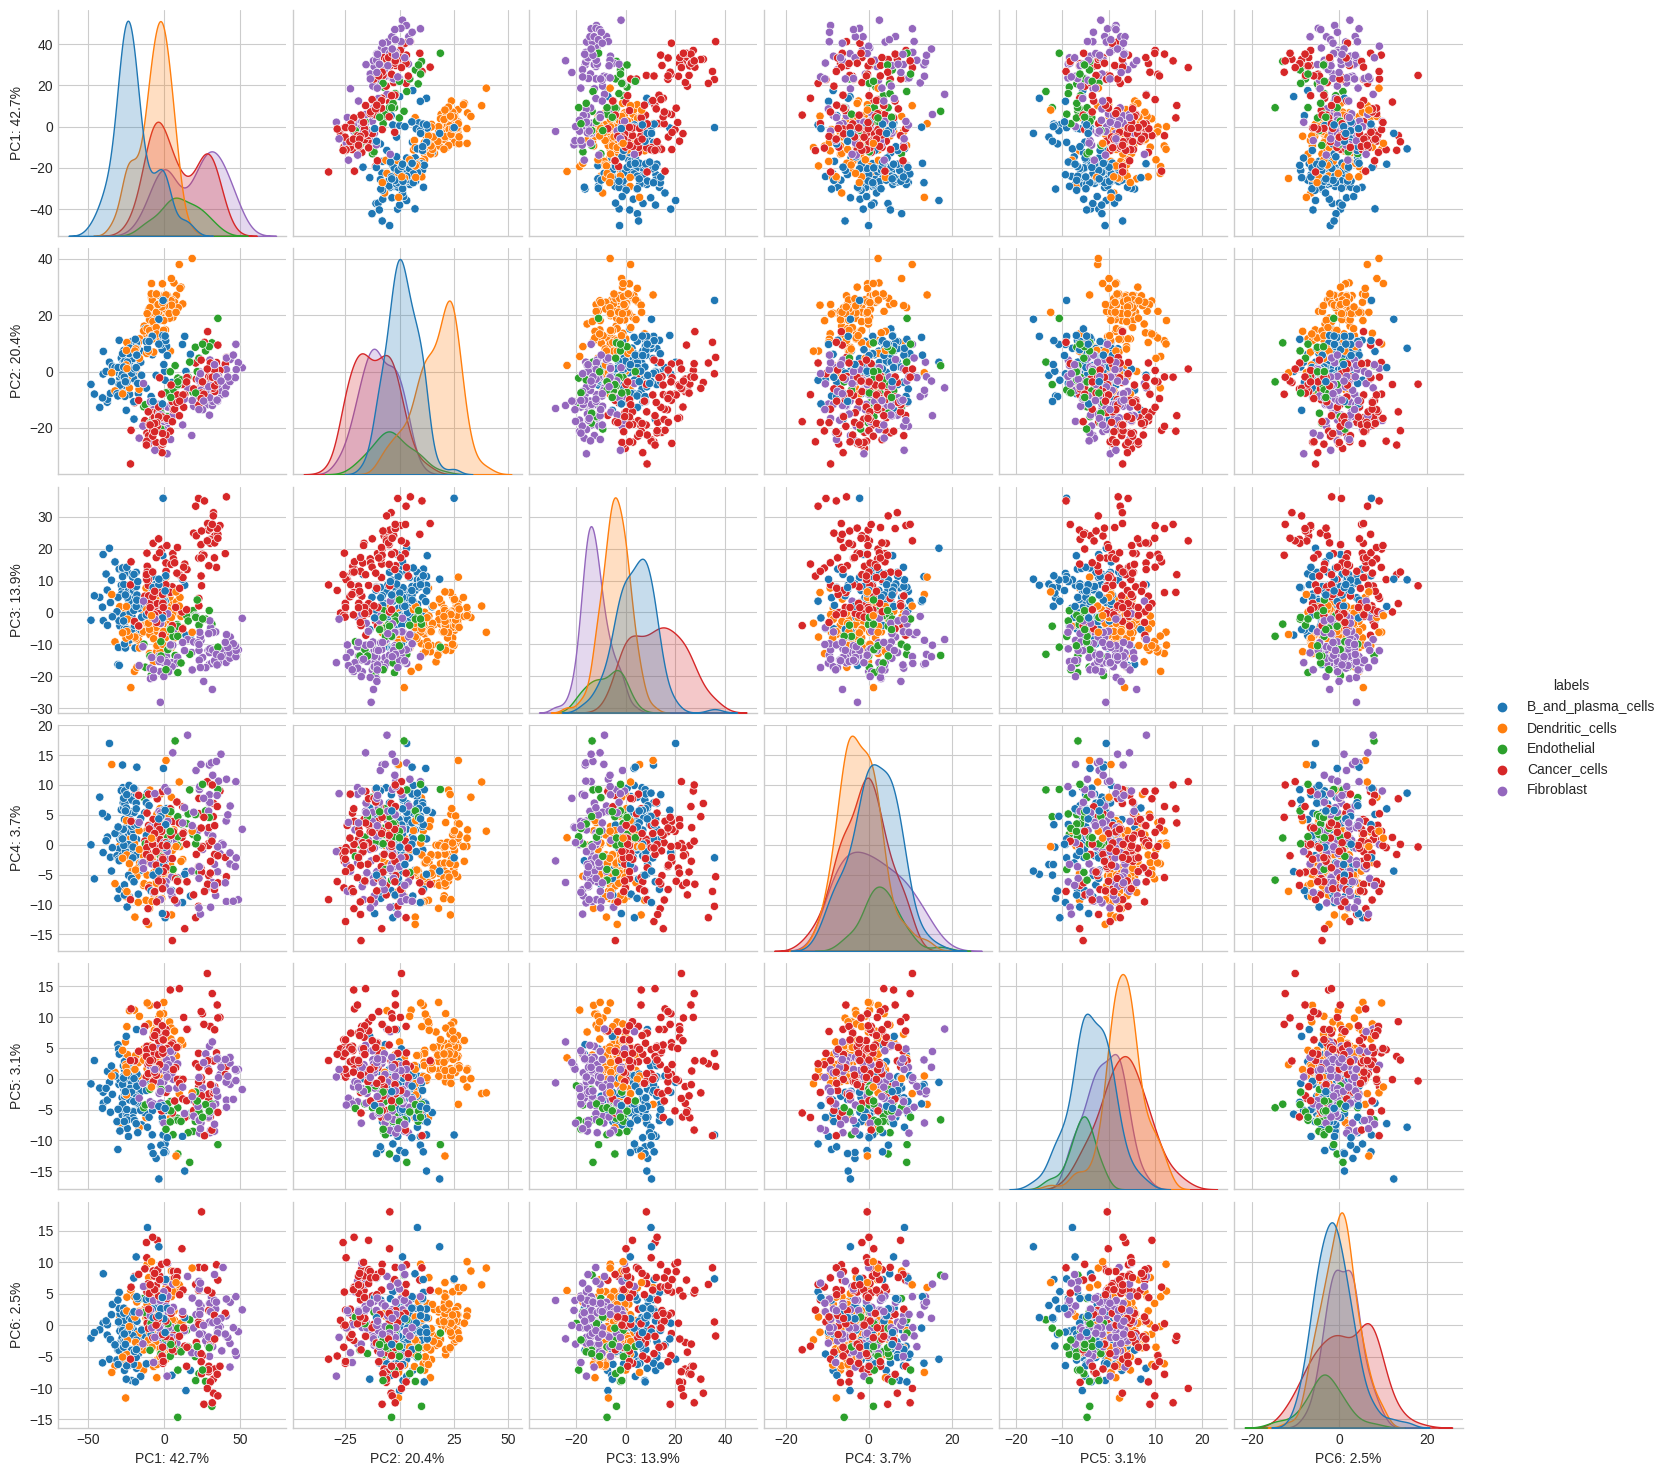

In [28]:
best_pca.pca_pairplot(colors = labels, n_components = 6)
plt.show()

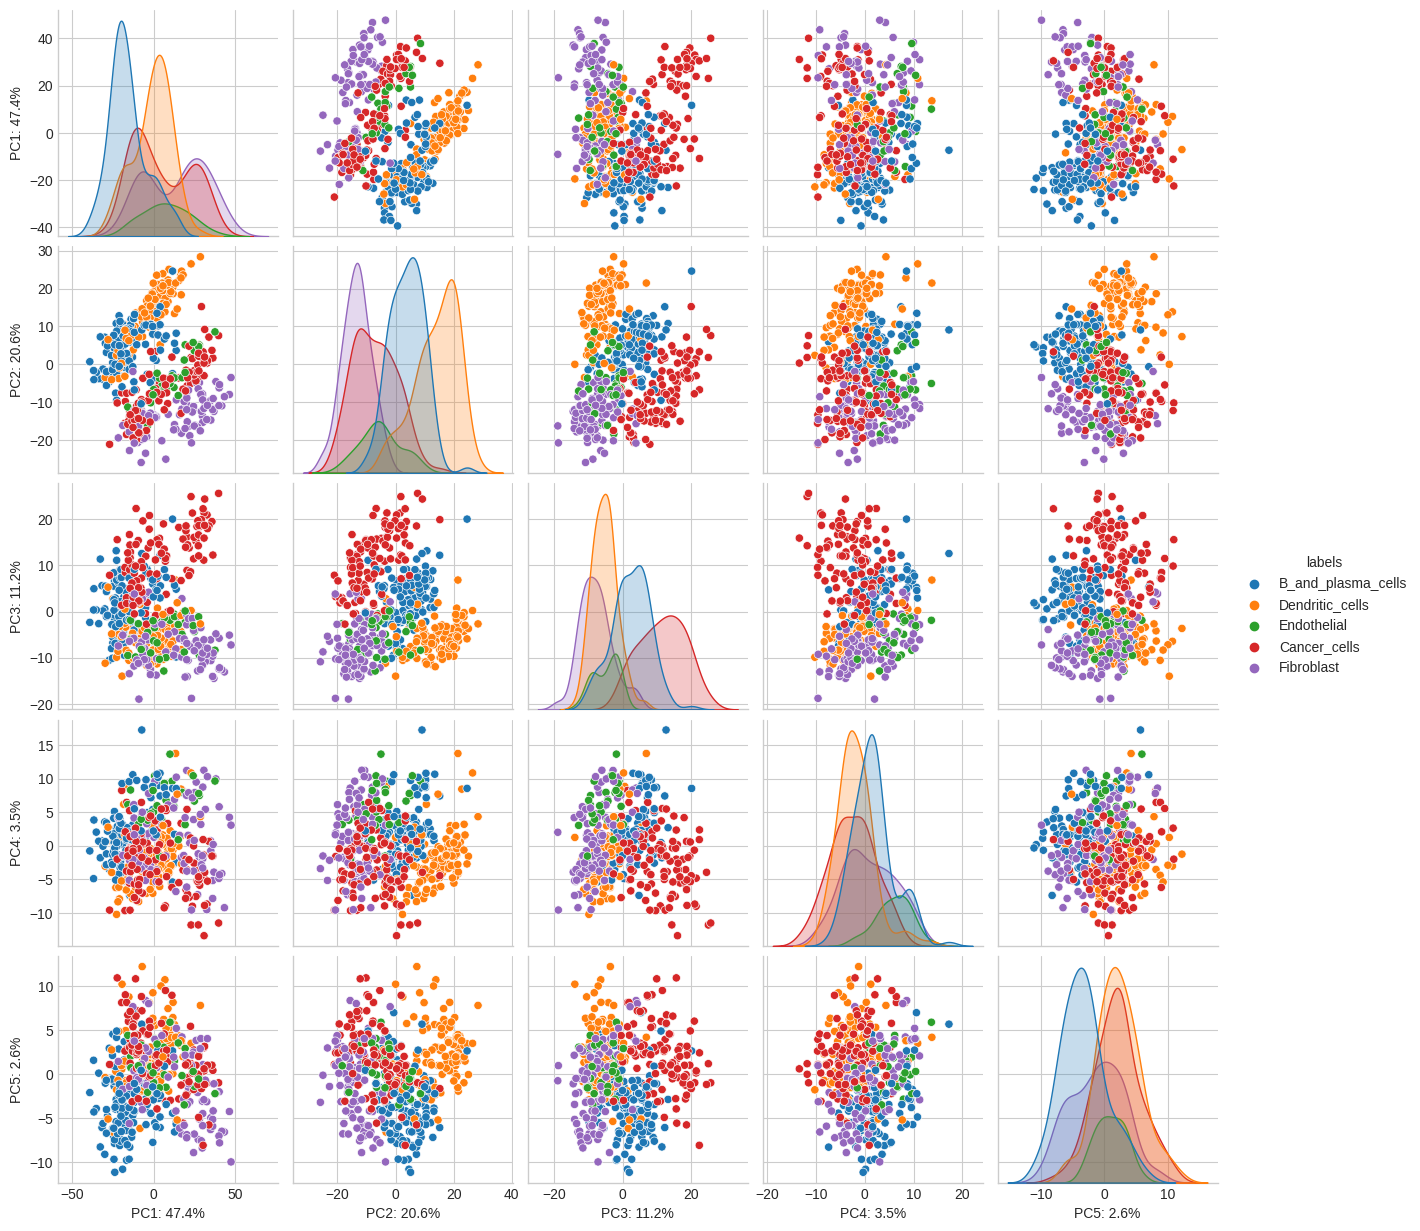

In [29]:
zi.pca_pairplot(colors = labels, n_components = 5)

### High benefits of zero-inflation
Some datasets are highly inflated (96% of zeros) and one need to take into account this zero-inflation. We load only a subset of the microcosm dataset but the whole dataset can be loaded (via the next function). Using the ZIPln model removes the noise induced by the zero inflation.

In [30]:
data_mic = load_microcosm()

#### Classic Pln 

Setting the offsets to zero
Now dataset of size torch.Size([261, 148])
Fitting a Pln model with full covariance model.
Initialization ...
Initialization finished
Tolerance 0.001 reached in 457 iterations


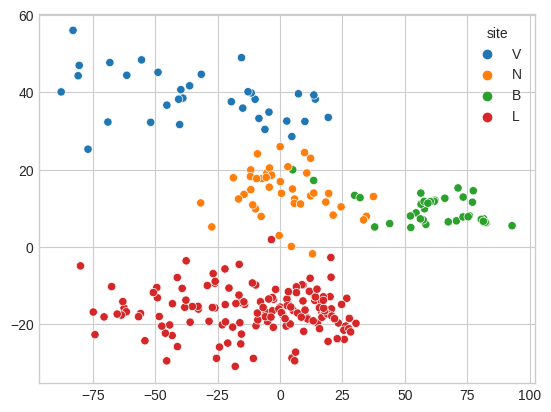

In [38]:
no_inflation = Pln.from_formula("endog ~ 1 + site*time", data = data_mic)
no_inflation.fit()
no_inflation.viz(colors = data_mic["site"][~no_inflation.samples_only_zeros.numpy()])

### With zero-inflation

exog_inflation are set to exog (if any). If you need different exog_inflation, specify it with a | like in the following: endog ~ 1 +x | x + y 
Setting the offsets to zero
Now dataset of size torch.Size([261, 148])
Fitting a ZIPln model with full covariance model with column-wise zero-inflation and closed form for latent prob.
Initialization ...


/home/bastien/These/pyPLNmodels/pyPLNmodels/_utils.py:808: UserWarning: The following (index) counts contains only zeros and are removed.[  4  11  19  25  26  46  65  80  97  99 107 115 123 144 159 167 174 177
 187 208 216 218 219 224 226 232 234 240 256 260 263 268 272 277 285 286
 287 290 295]
  warnings.warn(msg)


Initialization finished
Tolerance 0.001 reached in 323 iterations


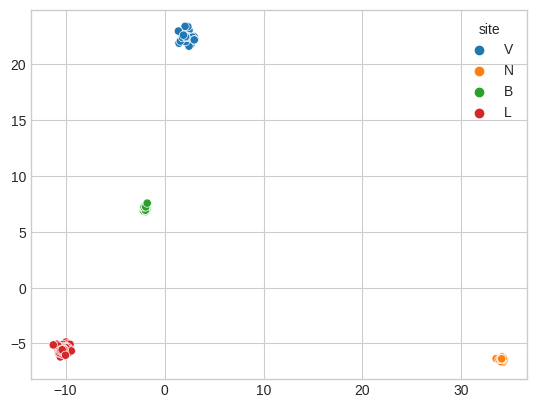

In [40]:
inflation = ZIPln.from_formula("endog ~ 1 + site*time", data = data_mic)
inflation.fit()
inflation.viz(colors = data_mic["site"][~inflation.samples_only_zeros.numpy()])

#### One can also visualize the latent probabilites

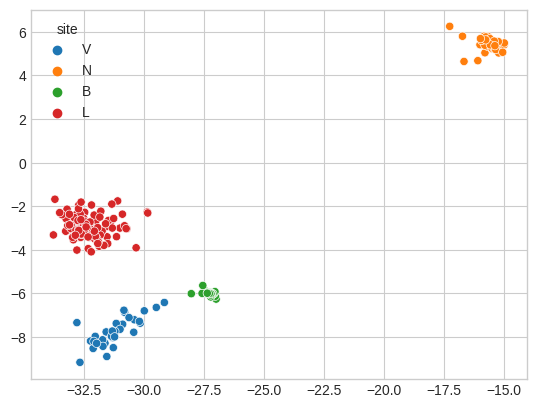

<AxesSubplot: >

In [41]:
inflation.viz_prob(colors = data_mic["site"][~inflation.samples_only_zeros.numpy()])